In [79]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

energie = pd.read_csv("C:/Users/cosyr/OneDrive/Documents/eco2mix-regional-cons-def.csv", sep = ";")
energie.tail()

,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),...,TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 30
1980283,93,Provence-Alpes-Côte d'Azur,Données consolidées,2022-05-31,23:30,2022-05-31T23:30:00+02:00,4319.0,665.0,NaN,0.0,...,NaN,0.00,0.00,0.00,0.00,21.02,27.74,4.65,68.60,NaN
1980284,11,Île-de-France,Données consolidées,2022-05-31,23:30,2022-05-31T23:30:00+02:00,6483.0,0.0,NaN,29.0,...,NaN,0.45,22.83,0.00,0.00,0.08,25.00,2.25,44.92,NaN
1980285,76,Occitanie,Données consolidées,2022-05-31,23:30,2022-05-31T23:30:00+02:00,3804.0,0.0,1252.0,13.0,...,47.79,0.34,0.82,0.03,0.04,30.42,21.90,1.81,46.31,NaN
1980286,24,Centre-Val de Loire,Données consolidées,2022-05-31,23:30,2022-05-31T23:30:00+02:00,4814.0,28.0,6822.0,236.0,...,58.66,4.90,16.63,0.00,0.00,0.02,1.09,1.39,76.14,NaN
1980287,44,Grand Est,Données consolidées,2022-05-31,23:30,2022-05-31T23:30:00+02:00,4525.0,1220.0,3724.0,585.0,...,34.42,12.93,14.24,0.00,0.00,24.00,46.99,2.70,47.84,NaN


In [80]:
def first_infos(energie):

    n_cols = len(energie.columns)
    n_rows = len(energie)
    n_duplicates = energie.duplicated().sum()
    n_na = energie.isna().sum().sum()

    return(n_cols, n_rows, n_duplicates, n_na)

first_infos(energie)

(32, 1980288, 0, 29677346)

In [81]:
def summary(energie):
    table = pd.DataFrame(
        index=energie.columns,
        columns=['type_info', '%_missing_values', 'nb_unique_values'])
    table.loc[:, 'type_info'] = energie.dtypes.values
    table.loc[:, '%_missing_values'] = energie.isna().sum().values / len(energie)
    table.loc[:, 'nb_unique_values'] = energie.nunique().values
    table.loc[:, 'min'] = energie.min()
    table.loc[:, 'max'] = energie.max()

    def get_list_unique_values(energie):
        dict_ = {}
        for col in energie.columns:
            if energie[col].nunique() < 15:
                dict_[col] = list(energie[col].unique())
            else:
                if energie[col].dtypes == "O":
                    dict_[col] = "Too much categories..."
                else:
                    dict_[col] = "Too much values..."
        return pd.DataFrame({'unique_values': dict_.values()},
                            index=energie.columns)

    infos_table_int1 = pd.merge(table,
                                get_list_unique_values(energie),
                                left_index=True,
                                right_index=True)

    def get_mean_mode(energie):
        dict_ = {}
        for col in energie.columns:
            if energie[col].dtypes == "O":
                dict_[col] = energie[col].mode()[0]
            else:
                dict_[col] = energie[col].mean()
        return pd.DataFrame(pd.Series(dict_), columns=["mean_mode_values"])

    infos_table_int2 = pd.merge(infos_table_int1,
                                get_mean_mode(energie),
                                left_index=True,
                                right_index=True)

    def alerts(energie):
        thresh_na = 0.25
        thresh_balance = 0.8
        dict_ = {}
        for col in energie.columns:
            if (energie[col].count() / len(energie)) < thresh_na:
                dict_[col] = "Too much missing values ! "
            elif energie[col].value_counts(
                    normalize=True).values[0] > thresh_balance:
                dict_[col] = "It's imbalanced !"
            else:
                dict_[col] = "Nothing to report"

        return pd.DataFrame(pd.Series(dict_), columns=["flag"])

    infos_table = pd.merge(infos_table_int2,
                           alerts(energie),
                           left_index=True,
                           right_index=True)

    return infos_table

summary(energie)

,type_info,%_missing_values,nb_unique_values,min,max,unique_values,mean_mode_values,flag
Code INSEE région,int64,0.000000,12,11,93,"[28, 27, 32, 75, 11, 53, 84, 93, 76, 52, 44, 24]",49.916667,Nothing to report
Région,object,0.000000,12,Auvergne-Rhône-Alpes,Île-de-France,"[Normandie, Bourgogne-Franche-Comté, Hauts-de-...",Auvergne-Rhône-Alpes,Nothing to report
Nature,object,0.000000,2,Données consolidées,Données définitives,"[Données définitives, Données consolidées]",Données définitives,It's imbalanced !
Date,object,0.000000,3438,2013-01-01,2022-05-31,Too much categories...,2013-01-01,Nothing to report
Heure,object,0.000000,48,00:00,23:30,Too much categories...,00:00,Nothing to report
Date - Heure,object,0.000000,165004,2013-01-01T00:00:00+01:00,2022-05-31T23:30:00+02:00,Too much categories...,2013-03-31T03:00:00+02:00,Nothing to report
Consommation (MW),float64,0.000006,13284,720.0,15338.0,Too much values...,4497.514319,Nothing to report
Thermique (MW),float64,0.000006,4022,-83.0,4293.0,Too much values...,378.349195,Nothing to report
Nucléaire (MW),float64,0.416670,13376,-144.0,13632.0,Too much values...,6232.624975,Nothing to report
Eolien (MW),float64,0.000055,4638,-6.0,4900.0,Too much values...,256.430221,Nothing to report


In [82]:
#Préparation des données
#On convertit en Object la variable Code INSEE région vu qu'il s'agit d'une variable catégorielle.
energie["Code INSEE région"] = energie["Code INSEE région"].astype('object')

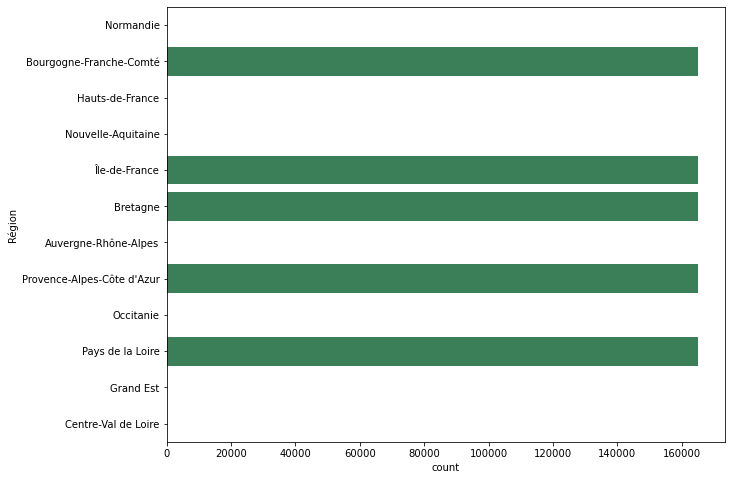

In [83]:
#Gestion des NA - Variable Nucléaire (MW)

nucleaire_na = energie[energie['Nucléaire (MW)'].isna()]

fig = plt.figure(figsize =(10, 8))
sns.countplot(y='Région',data=nucleaire_na, color = "seagreen");

#Remarque : pour la variable "Nucléaire (MW), 5 régions ont des valeurs NaN.
#Elles correspondent aux régions qui ne possèdent pas de réacteur nucléaire sur leur territoire. C'est donc normal que les NaN apparaissent.

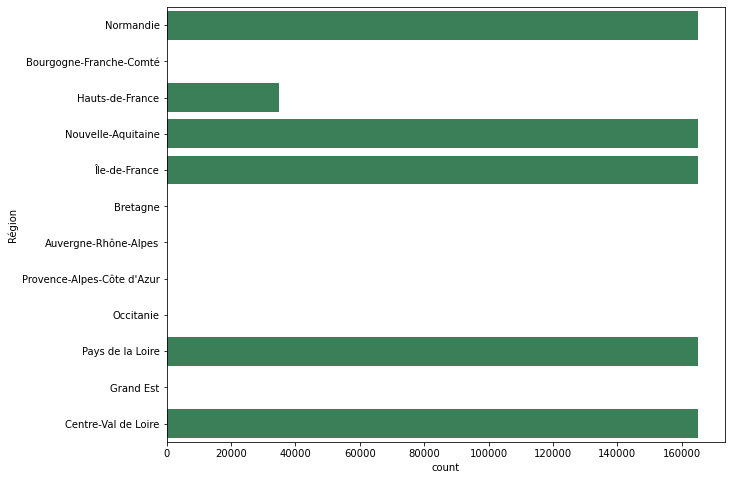

In [84]:
#Gestion des NA - Pompage (MW)
#Constat similaire que ci-dessus : toutes les régions n'ont pas recours à cette méthode

fig = plt.figure(figsize =(10, 8))
sns.countplot(y='Région',data=energie[energie['Pompage (MW)'].isna()], color = "seagreen");

In [133]:
#Gestion des NA - Stockage batterie

#Ajout d'une colonne Année

energie["Année"] = energie["Date"]
energie["Année"] = energie.Année.apply(lambda Année : Année.split("-")[0])

batt_na = energie[energie['Stockage batterie'].notna()]
batt_na["Année"].unique()

#Nous avons de la data seulement depuis les années 2021 et 2022
#On observe la même chose pour la variable Déstockage batterie

array(['2021', '2022'], dtype=object)

In [141]:
#Cumul EnR

energie["Cumul EnR"] = energie["Eolien (MW)"] + energie["Solaire (MW)"] + energie["Hydraulique (MW)"] + energie["Pompage (MW)"] + energie["Bioénergies (MW)"]

energie.tail()

,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),...,TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Année,Cumul EnR
1980283,93,Provence-Alpes-Côte d'Azur,Données consolidées,2022-05-31,23:30,2022-05-31T23:30:00+02:00,4319.0,665.0,NaN,0.0,...,0.00,0.00,0.00,0.00,21.02,27.74,4.65,68.60,2022,1109.0
1980284,11,Île-de-France,Données consolidées,2022-05-31,23:30,2022-05-31T23:30:00+02:00,6483.0,0.0,NaN,29.0,...,0.45,22.83,0.00,0.00,0.08,25.00,2.25,44.92,2022,NaN
1980285,76,Occitanie,Données consolidées,2022-05-31,23:30,2022-05-31T23:30:00+02:00,3804.0,0.0,1252.0,13.0,...,0.34,0.82,0.03,0.04,30.42,21.90,1.81,46.31,2022,1197.0
1980286,24,Centre-Val de Loire,Données consolidées,2022-05-31,23:30,2022-05-31T23:30:00+02:00,4814.0,28.0,6822.0,236.0,...,4.90,16.63,0.00,0.00,0.02,1.09,1.39,76.14,2022,NaN
1980287,44,Grand Est,Données consolidées,2022-05-31,23:30,2022-05-31T23:30:00+02:00,4525.0,1220.0,3724.0,585.0,...,12.93,14.24,0.00,0.00,24.00,46.99,2.70,47.84,2022,1793.0


In [86]:
#Gestion des NA - Eolien terrestre

eol_na = energie[energie['Eolien terrestre'].notna()]
eol_na["Année"].unique()

#Nous avons de la data seulement depuis les années 2021 et 2022
#On observe la même chose pour la variable Eolien offshore

array(['2021', '2022'], dtype=object)

In [87]:
TCOT = energie[energie['TCH Bioénergies (%)'].notna()]
TCOT["Année"].unique()

array(['2020', '2022'], dtype=object)

In [88]:
#Nettoyage des données
#Suppression de la colonne "Column 30" qui n'a pas d'intérêt

energie.drop('Column 30', axis=1, inplace=True)

In [89]:
#Nettoyage des données
#Suppression des données du 01/01/2013 00:00 (NaN sur la consommation)

energie = energie.loc[energie["Date - Heure"] > "2013-01-01T00:00:00+01:00"]

In [90]:
#Fitrage du dataframe sur les régions qui produisent de l'énergie nucléaire


nucléaire = energie[(energie['Région'] == 'Centre-Val de Loire') | (energie['Région'] == 'Normandie') | (energie['Région'] == 'Hauts-de-France') | (energie['Région'] == 'Grand Est') 
                    | (energie['Région'] == 'Nouvelle-Aquitaine') | (energie['Région'] == 'Occitanie')| (energie['Région'] == 'Auvergne-Rhône-Alpes')]

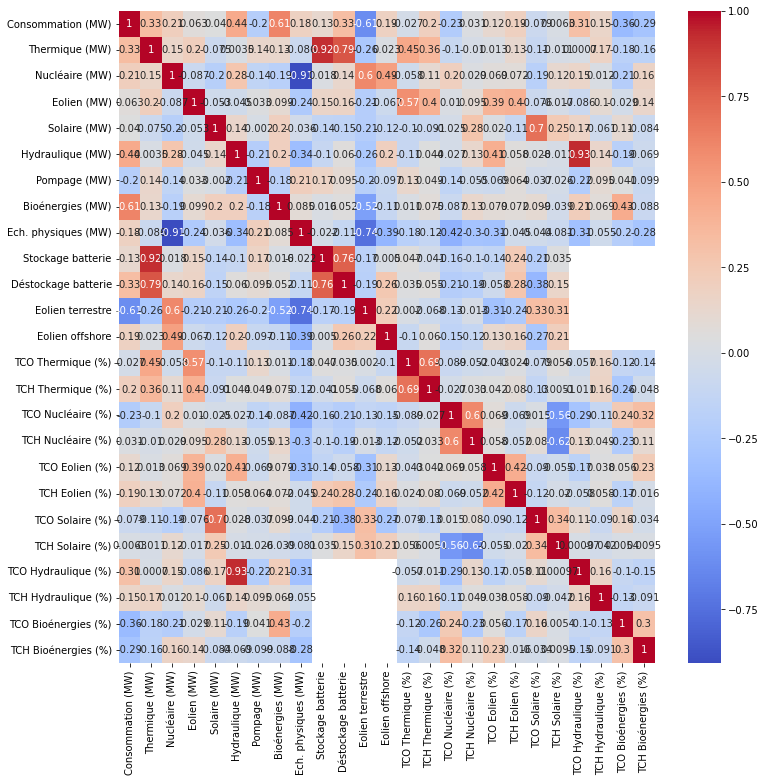

In [121]:
cor = energie.corr()

fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(cor, annot=True, ax=ax, cmap='coolwarm');

#Test statistique n°1 
#Dans la heatmap ci-dessous, on observe une forte corrélation entre les variables "Stockage batterie" et "Thermique (MW).
#C'est à dire que plus il y a de production d'énergie thermique, plus il y a de stockage d'énergie en batterie.

In [123]:
#Test statistique n°2
#Test entre 2 variables quantitatives : Échanges physiques vs Production Nucléaire (MW)

from scipy.stats import pearsonr

pd.DataFrame(pearsonr(nucléaire['Ech. physiques (MW)'], nucléaire['Nucléaire (MW)']), index=['pearson_coeff','p-value'], columns=['resultat_test'])

#la p-value est < 5% et le coefficient proche de -1. On observe une forte corrélation négative entre ces 2 variables.
#Lorsque la production d'énergie nucléaire augmente, les échanges physiques diminuent et inversement.

#Test statistique n°3
#Test entre 2 variables quantitatives : Échanges physiques vs Éolien terrestre
#Sur la heatmap, on observe une relation similaire entre les variables Ech. physiques et Éolien terrestre.
#Cela voudrait dire que lorsque la production d'éolien terrestre augmente, les échanges physiques diminuent et inversement.

,resultat_test
pearson_coeff,-0.907362
p-value,0.000000


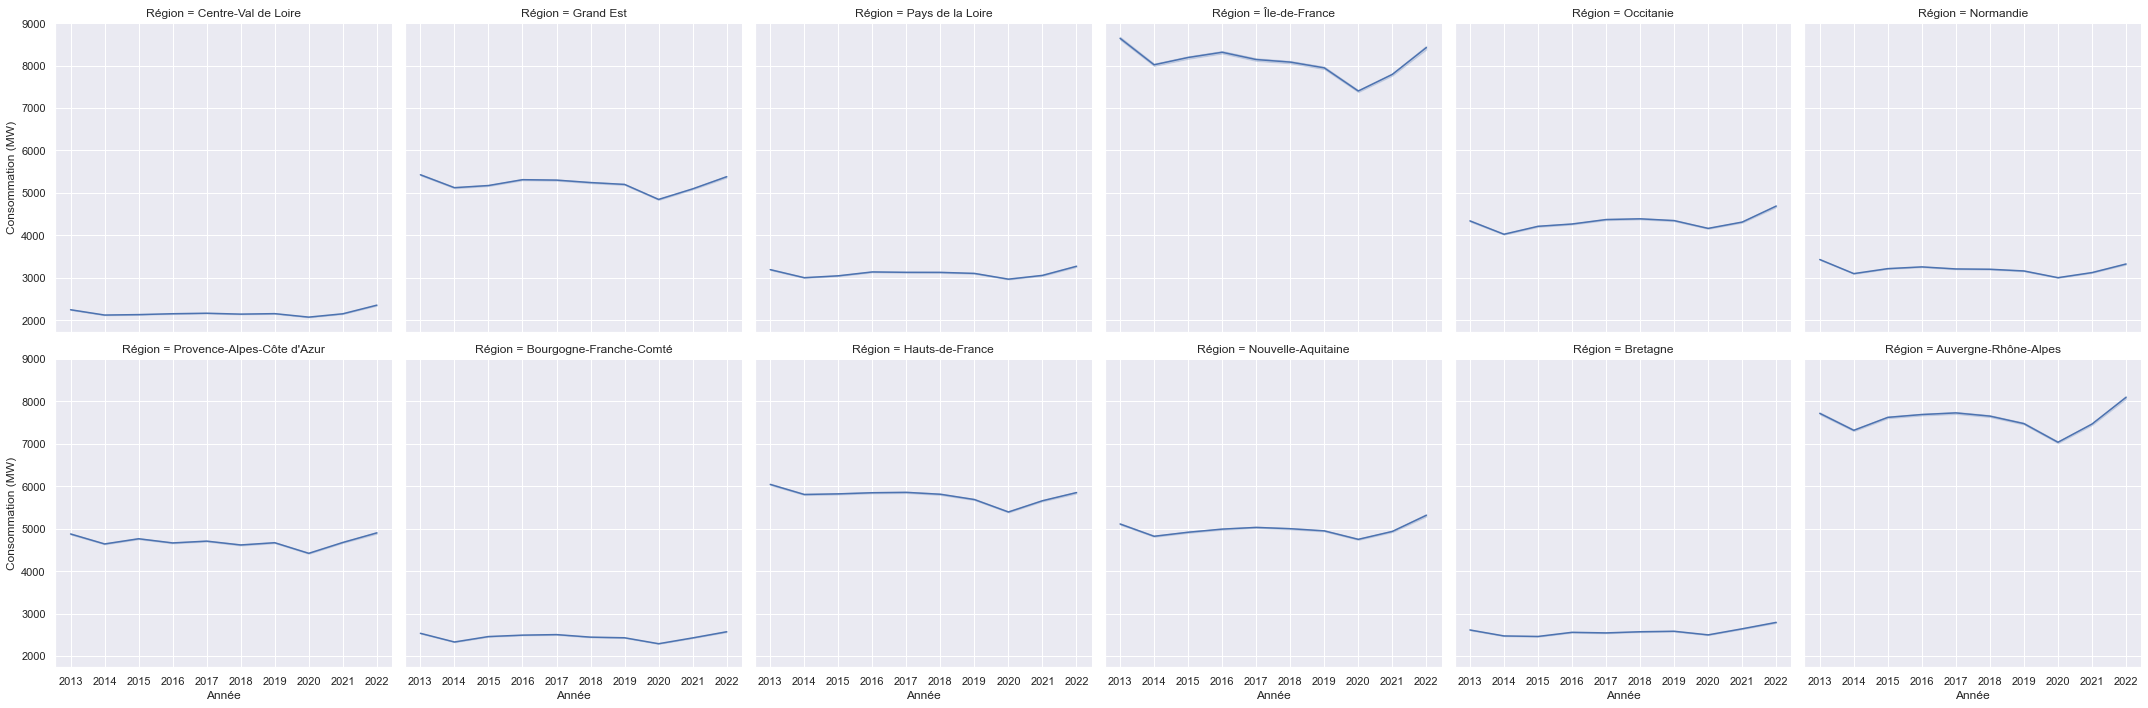

In [227]:
#Visualisation n°1 - évolution de la consommation de 2013 à 2022 par région

conso = energie[["Région", "Consommation (MW)", "Année", "Cumul EnR"]]

sns.relplot(data=conso, x="Année", y="Consommation (MW)", col = "Région", kind="line", col_wrap=6)

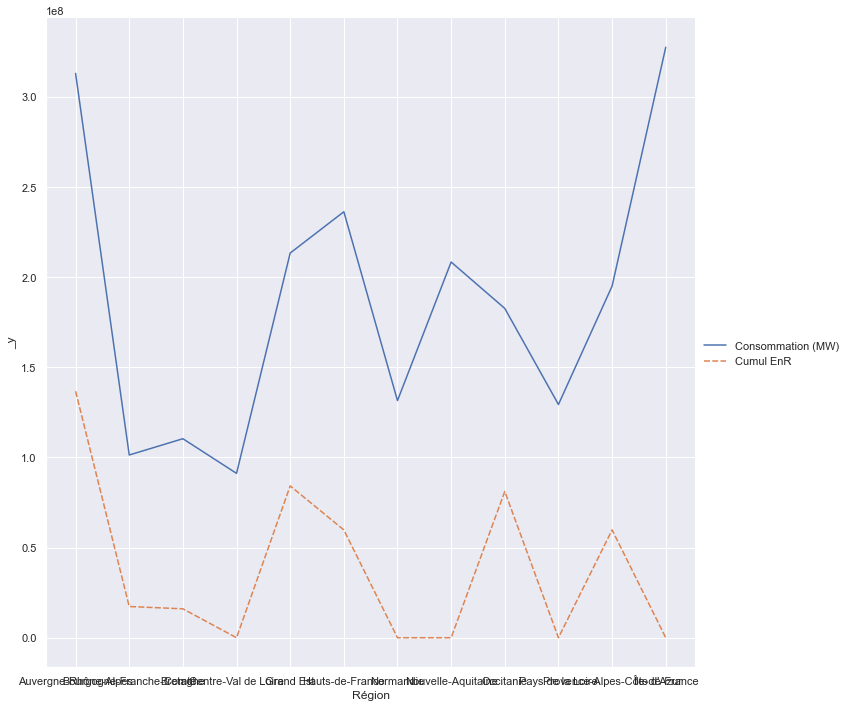

In [228]:
#Visualisation n°2 par région, part de la production d'énergies renouvelables vs la consommation totale

energie20_22 = energie.loc[energie["Année"]>"2019"]
energie20_22 = energie20_22[["Région", "Consommation (MW)", "Année", "Cumul EnR"]]

energie20_22 = energie20_22.groupby(["Région"]).sum()
energie20_22

sns.relplot(data=energie20_22, kind="line",height=10);